Economic and Cultural Appeals of Right-Wing Populism Analysing the Impact of Economic Insecurity and Cultural Backlash in Finland

Data Analysis Code Notebook


Ignacio Valero Rodenas
ivalero@ad.helsinki.fi

This Jupyter notebook documents the process of analyzing data from the European Social Survey (ESS) Round 10 to predict the likelihood of voting for the Finnish far-right wing populist party, Perussuomalaiset. The analysis is performed using logistic regression models that consider a set of economic and sociocultural variables as predictors.

The purpose of this analysis is to understand the factors that may influence a person's decision to vote for Perussuomalaiset, which has gained significant popularity in Finland in recent years. By examining the relationships between variaCles and voting behavior, we can gain insights into the social and political landscape of Finland and potentially inform policy decisions.

The data used in this analysis comes from the European Social Survey, which is a cross-national survey that measures attitudes, behaviors, and values across Europe. The specific variables used in the analysis were selected based on previous research and theories related to voting behavior.

This notebook is organized into several sections that describe the data cleaning, preparation, and analysis steps in detail. Each section includes code snippets and explanations that walk through the process step-by-step. The notebook also includes visualizations to help illustrate the relationships between variables and voting behavior.

Overall, this notebook serves as a comprehensive documentation of the analysis process and can be used as a resource for future research or policy decision-making.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the raw data
ess_df = pd.read_csv('C:/Users/innac/Desktop/VSCodeDesktop/IVR_UH_THESIS_2023/data/raw/ESS10/ESS10.csv')

# Print the first 5 rows of the dataset
print(ess_df.head())


         name  essround  edition    proddate   idno cntry   dweight   pspwght  \
0  ESS10e02_2        10      2.2  21.12.2022  10002    BG  1.939384  1.290706   
1  ESS10e02_2        10      2.2  21.12.2022  10006    BG  1.651595  1.430878   
2  ESS10e02_2        10      2.2  21.12.2022  10009    BG  0.315025  0.113172   
3  ESS10e02_2        10      2.2  21.12.2022  10024    BG  0.673037  1.436375   
4  ESS10e02_2        10      2.2  21.12.2022  10027    BG  0.394999  0.584889   

    pweight  anweight  ...                hinwe                iinwe  \
0  0.217716  0.281008  ...  2021-07-24 13:11:27  2021-07-24 13:11:35   
1  0.217716  0.311526  ...  2021-08-28 08:07:22  2021-08-28 08:07:39   
2  0.217716  0.024639  ...  2021-07-15 21:33:51  2021-07-15 21:34:36   
3  0.217716  0.312722  ...  2021-08-01 13:19:41  2021-08-01 13:20:15   
4  0.217716  0.127340  ...  2021-07-24 18:08:15  2021-07-24 18:09:09   

                 kinwe                vinwe                inwde  \
0  2021-07-2

C:\Users\innac\AppData\Local\Temp\ipykernel_19360\398622726.py:7: DtypeWarning: Columns (159,165,167,578) have mixed types. Specify dtype option on import or set low_memory=False.
  ess_df = pd.read_csv('C:/Users/innac/Desktop/VSCodeDesktop/IVR_UH_THESIS_2023/data/raw/ESS10/ESS10.csv')


Data Filtering


In [2]:
# Select subset of variables
var_list = ['uemp3m', 'agea', 'stfeco', 'hincfel', 'hincsrca', 'rlgdgr', 'edlvdfi', 'eduyrs', 
            'trstprl', 'trstlgl', 'trstplc', 'trstplt', 'trstprt', 'trstep', 'trstun', 
            'trstsci', 'prtvtefi', 'prtclffi', 'imbgeco', 'imueclt', 'imwbcnt', 'stfgov', 
            'stfdem', 'ipbhprp', 'impsafe', 'ipfrule', 'imptrad', 'lrscale', 'gndr', 
            'ipstrgv', 'hinctnta', 'atchctr']
#filter to only include cases from Finland
FI_df = ess_df.loc[ess_df['cntry'] == 'FI', var_list]

print(FI_df.head())

      uemp3m  agea  stfeco  hincfel  hincsrca  rlgdgr  edlvdfi  eduyrs  \
8259       2    24       5        2         1       0      5.0      12   
8260       2    77       7        1         4       8     12.0      14   
8261       2    33       4        2         1       0      9.0      18   
8262       1    75       7        2         1       7      5.0      10   
8263       1    32       8        2         1      10      6.0      18   

      trstprl  trstlgl  ...  stfdem  ipbhprp  impsafe  ipfrule  imptrad  \
8259        5        5  ...       5        1        1        1        4   
8260        6        8  ...       8        4        5        3        3   
8261        1        5  ...       6        1        2        2        4   
8262        7        8  ...       7        2        1        3        5   
8263        7        9  ...       8        1        1        1        2   

      lrscale  gndr  ipstrgv  hinctnta  atchctr  
8259        5     2        4         1        9  
8260

In [3]:
FI_df.describe()



,uemp3m,agea,stfeco,hincfel,hincsrca,rlgdgr,edlvdfi,eduyrs,trstprl,trstlgl,...,stfdem,ipbhprp,impsafe,ipfrule,imptrad,lrscale,gndr,ipstrgv,hinctnta,atchctr
count,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,...,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.00000,1577.000000,1577.000000,1577.000000
mean,1.645529,52.609385,7.136335,1.774255,2.639188,4.769816,23.228282,14.768548,6.717819,7.725428,...,8.202917,2.941661,2.595434,3.195308,3.327838,8.578947,1.50539,2.547876,9.837032,8.832594
std,0.478504,19.323281,7.864965,0.695177,4.510401,5.440229,329.218986,6.178013,4.124600,4.350748,...,8.510186,1.368758,1.295709,1.427576,1.454799,15.266092,0.50013,1.365510,17.088919,3.614498
min,1.000000,15.000000,0.000000,1.000000,1.000000,0.000000,1.000000,4.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000
25%,1.000000,37.000000,5.000000,1.000000,1.000000,2.000000,5.000000,12.000000,5.000000,7.000000,...,7.000000,2.000000,2.000000,2.000000,2.000000,4.000000,1.00000,2.000000,4.000000,8.000000
50%,2.000000,55.000000,7.000000,2.000000,1.000000,5.000000,7.000000,14.000000,7.000000,8.000000,...,8.000000,3.000000,2.000000,3.000000,3.000000,6.000000,2.00000,2.000000,7.000000,9.000000
75%,2.000000,69.000000,8.000000,2.000000,4.000000,7.000000,10.000000,17.000000,8.000000,9.000000,...,9.000000,4.000000,3.000000,4.000000,4.000000,8.000000,2.00000,3.000000,9.000000,10.000000
max,2.000000,90.000000,88.000000,8.000000,88.000000,88.000000,8888.000000,88.000000,88.000000,88.000000,...,88.000000,8.000000,8.000000,8.000000,8.000000,88.000000,2.00000,8.000000,88.000000,88.000000


Data Wrangling

In this section, we will perform data wrangling on the ESS Round 10 dataset for Finland. The data wrangling process will be done in blocks, and each transformation will be referenced to the main document. The goal of this data wrangling is to prepare the data for analysis by selecting relevant variables and recoding values for missing data. This will ensure that the data is clean and ready for the logistic regression models that we will build in the next sections.

4.2.1	Demographic Controls

The Age variable was operationalized as the self-reported age of the participants.  

Gender was coded based on the self-reported gender of the participants. The binary variable took the value of 1 for male and 0 for female due to the limited options provided by the ESS.


Education Years were measured by asking participants to report the number of years of formal education they had completed.

The Left-Right Scale measures a participant's political orientation on a left-right scale ranging from 0 (left) to 10 (right). By including this variable as a demographic control, we can account for the potential impact of political ideology on attitudes towards economic insecurity and trust in institutions.

National Attachment measures a participant's attachment to their country on a scale from 0 (not at all attached) to 10 (very attached).


Demographic Controls

The Age variable was operationalized as the self-reported age of the participants.  

Gender was coded based on the self-reported gender of the participants. The binary variable took the value of 1 for male and 0 for female due to the limited options provided by the ESS.

Education Years were measured by asking participants to report the number of years of formal education they had completed. 

The Left-Right Scale measures a participant's political orientation on a left-right scale ranging from 0 (left) to 10 (right). By including this variable as a demographic control, we can account for the potential impact of political ideology on attitudes towards economic insecurity and trust in institutions.

National Attachment measures a participant's attachment to their country on a scale from 0 (not at all attached) to 10 (very attached).


In [4]:


# EducationYears
FI_df['EducationYears'] = np.where(FI_df['eduyrs'].isin(range(77, 100)), np.nan, FI_df['eduyrs'])
# Age
FI_df['Age'] = np.where(FI_df['agea'] == 999, np.nan, FI_df['agea'])



FI_df['Gender'] = np.where(FI_df['gndr'].between(77, 99), np.nan, FI_df['gndr'])


FI_df['LeftRightScale'] = np.where(FI_df['lrscale'].between(77, 99), np.nan, FI_df['lrscale'])

FI_df['National_attachment'] = np.where(FI_df['atchctr'].between(77, 99), np.nan, FI_df['atchctr'])




Economic Insecurity Variables

In [5]:
# Income source
# Creating a new variable IncomeGroup based on the main source of household income
FI_df['WelfareDependent'] = np.where(FI_df['hincsrca'].isin(range(1, 4)), 0,
                          np.where(FI_df['hincsrca'].isin(range(4, 7)), 1,
                          np.where(FI_df['hincsrca'] == 7, 0,
                          np.where(FI_df['hincsrca'] == 8, 0, np.nan))))


# Income Insecurity
FI_df['SubjectiveEconomicInsecurity'] = np.where(FI_df['hincfel'].isin(range(7, 10)), np.nan, FI_df['hincfel'])


# Economy Satisfaction
FI_df['EconomySatisfaction'] = np.where(FI_df['stfeco'].isin(range(77, 100)), np.nan, FI_df['stfeco'])

# Employment status
FI_df['Unemployment3Months'] = np.where(FI_df['uemp3m'] == 1, 1,
                                np.where(FI_df['uemp3m'].isin(range(7, 10)), np.nan, 0))







Economic insecurity is a multifaceted concept that encompasses a range of economic challenges individuals and communities may face, such as unemployment, underemployment, low wages, and poverty (Billiet et al., 2014). Economic insecurity can also manifest in the form of income volatility, debt, lack of savings, and limited access to credit. These factors contribute to a sense of uncertainty and unpredictability about one's financial future, which can create stress and anxiety (Kopasker et al., 2018).
Subjective Economic Insecurity was extracted from the ESS item “hincfel”, which reflects the respondent’s feeling about its household income nowadays. Participants were asked to choose the description on the card that comes closest to how they feel about their household income nowadays. The options included living comfortably on present income, coping on present income, difficult on present income, and very difficult on present income, with a higher value indicating a greater feeling of economic insecurity. Responses of refusal, don't know, and no answer were considered missing values.
In addition to the main predictor variable of economic insecurity, several other relevant variables will be introduced in the analysis. 
The dichotomous variable Welfare-Dependent was created based on the main source of household income (ESS Code: hincsrca), identifying individuals whose households receive some form of social benefit as their primary income source. It is coded as welfare dependent (1) or not (0).
Economy Satisfaction uses the original values of the ESS item "stfeco." It assesses the respondent’s satisfaction with the country's economy, with a more holistic approach than our main predictor, taking into account various factors beyond just household income. This variable is scaled from 0 to 10, with higher values indicating higher levels of satisfaction. 


Sociocultural Attitudes

In [6]:
# ANTI_IMMIGRATION SCALE (AIS) (0-100)
FI_df['EconomicImpactImmigration'] = np.where(FI_df['imbgeco'].isin(range(0, 11)), FI_df['imbgeco'], np.nan)
FI_df['CulturalImpactImmigration'] = np.where(FI_df['imueclt'].isin(range(0, 11)), FI_df['imueclt'], np.nan)
FI_df['OverallImpactImmigration'] = np.where(FI_df['imwbcnt'].isin(range(0, 11)), FI_df['imwbcnt'], np.nan)

FI_df['AntiImmigrationScale'] = 100 - (FI_df[['EconomicImpactImmigration', 'CulturalImpactImmigration', 'OverallImpactImmigration']].sum(axis=1, skipna=True) / 30 * 100)

# MISTRUST_GLOBAL (0-100)
FI_df['TrustUN'] = np.where(FI_df['trstun'].isin(range(0, 11)), FI_df['trstun'], np.nan)
FI_df['TrustEuropeanParliament'] = np.where(FI_df['trstep'].isin(range(0, 11)), FI_df['trstep'], np.nan)

FI_df['Trust in International Institutions'] = FI_df[['TrustUN', 'TrustEuropeanParliament']].sum(axis=1, skipna=True) / 20 * 100

# MISTRUST_NATIONAL (0-100)
FI_df['TrustPoliticians'] = np.where(FI_df['trstplt'].isin(range(0, 11)), FI_df['trstplt'], np.nan)
FI_df['SatisfactionWithGovernment'] = np.where(FI_df['stfgov'].isin(range(0, 11)), FI_df['stfgov'], np.nan)
FI_df['SatisfactionWithDemocracy'] = np.where(FI_df['stfdem'].isin(range(0, 11)), FI_df['stfdem'], np.nan)
FI_df['TrustParliament'] = np.where(FI_df['trstprl'].isin(range(0, 11)), FI_df['trstprl'], np.nan)
FI_df['TrustPoliticalParties'] = np.where(FI_df['trstprt'].isin(range(0, 11)), FI_df['trstprt'], np.nan)

FI_df['Trust In National Institutions'] = FI_df[['TrustPoliticians', 'SatisfactionWithGovernment', 'SatisfactionWithDemocracy', 'TrustParliament', 'TrustPoliticalParties']].sum(axis=1, skipna=True) / 50 * 100

# Trust in Scientists
FI_df['TrustInScientists'] = np.where(FI_df['trstsci'].isin(range(0, 11)), FI_df['trstprl'], np.nan)
# AUTHORITARIAN VALUES (0-100)
FI_df['impsafe_model'] = np.where(FI_df['impsafe'].isin(range(0, 7)), FI_df['impsafe'], np.nan)
FI_df['ipfrule_model'] = np.where(FI_df['ipfrule'].isin(range(0, 7)), FI_df['ipfrule'], np.nan)
FI_df['ipbhprp_model'] = np.where(FI_df['ipbhprp'].isin(range(0, 7)), FI_df['ipbhprp'], np.nan)
FI_df['ipstrgv_model'] = np.where(FI_df['ipstrgv'].isin(range(0, 7)), FI_df['ipstrgv'], np.nan)
FI_df['imptrad_model'] = np.where(FI_df['imptrad'].isin(range(0, 7)), FI_df['imptrad'], np.nan)

FI_df['Authoritarian Values'] = FI_df[['impsafe_model', 'ipfrule_model', 'ipbhprp_model', 'ipstrgv_model', 'imptrad_model']].sum(axis=1, skipna=True) / 30 * 100




FI_df[['TrustPoliticians', 'SatisfactionWithGovernment', 'SatisfactionWithDemocracy', 'TrustParliament', 'TrustPoliticalParties', 'TrustEuropeanParliament','TrustUN', 'TrustInScientists']].describe()


,TrustPoliticians,SatisfactionWithGovernment,SatisfactionWithDemocracy,TrustParliament,TrustPoliticalParties,TrustEuropeanParliament,TrustUN,TrustInScientists
count,1571.000000,1567.000000,1560.000000,1574.000000,1569.000000,1542.000000,1540.000000,1563.000000
mean,5.433482,6.293555,7.333333,6.562897,5.459528,5.636835,6.609740,6.616123
std,2.034386,2.133322,1.738274,2.102472,1.994840,2.184042,1.975887,2.939387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,5.000000,7.000000,5.000000,4.000000,4.000000,5.000000,5.000000
50%,6.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000
75%,7.000000,8.000000,9.000000,8.000000,7.000000,7.000000,8.000000,8.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,88.000000


In this study, we measure sociocultural variables using composites sourced from the Cultural Backlash framework. (Inglehart & Norris, 2016; Norris & Inglehart, 2018) These composites are constructed by combining relevant items from the European Social Survey (ESS) that measure attitudes towards immigration and politics, and authoritarian values. 
In order to measure Anti-Immigrtion attitudes, we will use three separate items from the European Social Survey, which will be labelled Economic Impact ("Immigration is bad or good for the country's economy", imbgeco), Cultural Impact ("Country's cultural life is undermined or enriched by immigrants" (imueclt) and Overall Impact of Immigration  ("Immigrants make the country a worse or better place to live.", imwbcnt).  These items have been previously used in research regarding Anti-Immigration Attitudes (Norris & Inglehart, 2018), but in the context of this research we have special interest on assessing the effects of the separate components of this sentiment.
The Authoritarian Values variable measures attitudes towards authoritarian values in Finland. The construction follows the steps of the Inglehart and Norris models (Inglehart & Norris, 2016; Norris & Inglehart, 2018) It is derived from responses to five separate questions related to safety, rule of law, respect for authority, traditional values, and strong leadership. Responses to each question are scaled from 0 to 6, and then the values are summed and converted to a scale from 0 to 100, with higher scores indicating stronger authoritarian values. The Cronbach's alpha for this variable was 0.65 (95% CI [0.625, 0.68]), indicating a moderate level of internal consistency.
Additionally, trust-measuring variables were included, also following Inglehart and Norris research (Inglehart & Norris, 2016; Norris & Inglehart, 2018). Trust has been consistently mentioned as a  key factor in the development of support for populist parties (Canovan, 1999; Ivanov, 2023). Although not in the main scope of the study, it was considered as a source of potential insights within the sociocultural variables, and is included in the models.
Trust in International Institutions, composed from two individual ESS items, "Trust in UN" and "Trust in European Parliament", were created by extracting values from two different items of the ESS survey, and then combined by taking the sum and converting the scale to a percentage score ranging from 0 to 100. The resulting variable is a continuous variable that ranges from 0 to 100 and higher scores indicate higher levels of trust in international institutions.

Trust in National Institutions, a set of variables from ESS that encompasses "Trust in Politicians", "Satisfaction With National Government", "Satisfaction With Democracy", "Trust in Parliament", and "Trust in Political Parties".  The Cronbach's alpha coefficient for this variable was 0.90 (α = 0.90, CI [0.89, 0.91]). The scores are combined by taking the sum and converting the scale to a percentage score ranging from 0 to 100. The resulting variable is a continuous variable that ranges from 0 to 100 and higher scores indicate higher levels of trust in national institutions. This is a more complete variable than the one used by Norris and Inglehart (2018), since later rounds of ESS have included more items on the topic.

Lastly, there was a decision to include an additional variable reflecting trust in the scientific community, which was a novelty variable for this round of the European Social Survey (Round 10). In a post-pandemic world, trust in science and scientists has become an increasingly relevant aspect, particularly in countries where populism is on the rise (Magnus, 2022). The COVID-19 pandemic has highlighted the critical role that science plays in society and has emphasized the need for evidence-based decision-making. Trust in scientists and their findings can influence the public's behavior and adherence to public health measures  (Magnus, 2022). Therefore, understanding the level of trust in scientists is important for policymakers and public health officials, particularly in the context of a rise in populism where skepticism towards science and expertise has become more prevalent.
Trust in Scientists reports the values from the ESS survey item "trstsci", which asks participants to rate their trust in scientists. The resulting variable is a continuous variable that ranges from 0 to 10 and higher scores indicate higher levels of trust the scientific community.
By using composites of relevant items from the ESS, we are able to construct measures of sociocultural variables that have been widely used in previous research and are theoretically relevant to the study of populist attitudes and support.
 


In [7]:


########TARGET VARIABLE############
FI_df['VotedPS'] = np.where(FI_df['prtvtefi'] == 5, 1, np.where(FI_df['prtvtefi'].between(66, 99), np.nan, 0))
################################################################################################################
import pandas as pd

# Assuming FI_df is your DataFrame
counts = FI_df['VotedPS'].value_counts(dropna=False)
percentages = FI_df['VotedPS'].value_counts(normalize=True, dropna=False) * 100

# Display the counts and percentages
print("Counts:")
print(counts)
print("\nPercentages:")
print(percentages)


Counts:
0.0    979
NaN    465
1.0    133
Name: VotedPS, dtype: int64

Percentages:
0.0    62.079899
NaN    29.486367
1.0     8.433735
Name: VotedPS, dtype: float64


In our study, we have defined a binary dependent variable, “VotedPS”, that measures whether an individual voted for the target political party, Perussuomalaiset, or not. To create this variable, we used a combination of responses from the ESS survey data. Specifically, we looked at the response to the question about which party the individual voted for in the most recent national election (prtvtefi). If the response to this question was 5, indicating that the individual voted for Perussuomalaiset, we assigned a value of 1 to our target variable. Conversely, if the response was between 66 and 99, which indicates that the individual did not vote or did not disclose which party they voted for, we assigned a value of NaN (missing data) to our target variable. Finally, if the response indicated that the individual voted for any other political party, we assigned a value of 0 to our target variable. By creating this binary variable, we are able to examine the factors that contribute to voting behavior and specifically, the factors that may be associated with support for Perussuomalaiset.

Data Cleaning

In [8]:
# Sociocultural variables
Sociocultural_df = FI_df[['AntiImmigrationScale','EconomicImpactImmigration', 'CulturalImpactImmigration', 'OverallImpactImmigration', 'Trust in International Institutions', 'Trust In National Institutions', 'Authoritarian Values', 'TrustInScientists']]

# Economic variables
Economic_df = FI_df[['WelfareDependent', 'SubjectiveEconomicInsecurity', 'EconomySatisfaction', 'Unemployment3Months']]

# Demographic variables
Demographics_df = FI_df[['Age', 'Gender', 'EducationYears', 'LeftRightScale', 'National_attachment']]


# Target variable
FI_df['VotedPS'] = np.where(FI_df['prtvtefi'] == 5, 1, np.where(FI_df['prtvtefi'].between(66, 99), np.nan, 0))


# Combine all variables into one dataframe
model_df = pd.concat([Demographics_df, Economic_df, Sociocultural_df, FI_df['VotedPS']], axis=1)

# Drop rows with missing values
model_df.dropna(inplace=True)
# Print sample size before and after cleaning
print("Sample size before cleaning:", len(FI_df))
print("Sample size after cleaning:", len(model_df))
 


Sample size before cleaning: 1577
Sample size after cleaning: 1074


DESCRIPTIVE STATISTICS: DEMOGRAPHICS

In [9]:
import pandas as pd

# assuming your data frame is named 'model_df'
grouped = model_df.groupby('Gender')

# select the columns for which you want to calculate descriptive statistics
cols = ['Age', 'EducationYears', 'LeftRightScale', 'National_attachment']

# calculate descriptive statistics for each group
stats = grouped[cols].agg(['mean', 'std']).round(2)

# format the output table
stats.index = ['Male', 'Female']
stats.columns = pd.MultiIndex.from_product([cols, ['Mean', 'SD']])
stats.index.name = 'Variable'

# print the table
print('Descriptive Statistics for Demographic Variables')
print(stats)


Descriptive Statistics for Demographic Variables
            Age        EducationYears       LeftRightScale        \
           Mean     SD           Mean    SD           Mean    SD   
Variable                                                           
Male      54.73  17.48          14.53  3.93           5.94  2.41   
Female    55.27  17.78          15.52  4.29           5.51  2.27   

         National_attachment        
                        Mean    SD  
Variable                            
Male                    8.66  1.43  
Female                  8.99  1.14  


In [10]:
print(model_df[['Age', 'EducationYears', 'LeftRightScale', 'National_attachment']].describe())



               Age  EducationYears  LeftRightScale  National_attachment
count  1074.000000     1074.000000     1074.000000          1074.000000
mean     55.000000       15.029795        5.723464             8.824953
std      17.624699        4.143854        2.349053             1.299900
min      20.000000        4.000000        0.000000             2.000000
25%      41.000000       12.000000        4.000000             8.000000
50%      57.000000       15.000000        6.000000             9.000000
75%      69.750000       18.000000        8.000000            10.000000
max      90.000000       40.000000       10.000000            10.000000


DESCRIPTIVES: ECONOMIC VARIABLES

In [11]:
print("WelfareDependent")
print(model_df['WelfareDependent'].value_counts())
print("\n")

print("Unemployment3Months")
print(model_df['Unemployment3Months'].value_counts())
print("\n")

print("SubjectiveEconomicInsecurity")
print(model_df['SubjectiveEconomicInsecurity'].describe())
print("\n")


print("EconomySatisfaction")
print(model_df['EconomySatisfaction'].describe())
print("\n")






WelfareDependent
0.0    655
1.0    419
Name: WelfareDependent, dtype: int64


Unemployment3Months
0.0    713
1.0    361
Name: Unemployment3Months, dtype: int64


SubjectiveEconomicInsecurity
count    1074.00000
mean        1.72067
std         0.63613
min         1.00000
25%         1.00000
50%         2.00000
75%         2.00000
max         4.00000
Name: SubjectiveEconomicInsecurity, dtype: float64


EconomySatisfaction
count    1074.000000
mean        6.443203
std         1.798580
min         0.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        10.000000
Name: EconomySatisfaction, dtype: float64




DESCRIPTIVES: SOCIOCULTURAL VARIABLES

In [12]:
model_df[['EconomySatisfaction', 'SubjectiveEconomicInsecurity', 'AntiImmigrationScale', 'EconomicImpactImmigration', 'CulturalImpactImmigration', 'OverallImpactImmigration', 'Trust in International Institutions', 'Trust In National Institutions', 'Authoritarian Values', 'LeftRightScale', 'National_attachment']].describe()


,EconomySatisfaction,SubjectiveEconomicInsecurity,AntiImmigrationScale,EconomicImpactImmigration,CulturalImpactImmigration,OverallImpactImmigration,Trust in International Institutions,Trust In National Institutions,Authoritarian Values,LeftRightScale,National_attachment
count,1074.000000,1074.00000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000,1074.000000
mean,6.443203,1.72067,33.848541,6.416201,7.413408,6.015829,62.220670,63.951583,47.389820,5.723464,8.824953
std,1.798580,0.63613,17.825318,2.150653,1.886442,2.013637,18.349377,15.985708,14.242261,2.349053,1.299900
min,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000
25%,6.000000,1.00000,23.333333,5.000000,7.000000,5.000000,50.000000,54.000000,36.666667,4.000000,8.000000
50%,7.000000,2.00000,30.000000,7.000000,8.000000,6.000000,65.000000,68.000000,46.666667,6.000000,9.000000
75%,8.000000,2.00000,43.333333,8.000000,9.000000,7.000000,75.000000,76.000000,56.666667,8.000000,10.000000
max,10.000000,4.00000,100.000000,10.000000,10.000000,10.000000,100.000000,96.000000,100.000000,10.000000,10.000000


In [13]:
# Select the columns to be melted
cols_to_melt = ['EconomySatisfaction', 'SubjectiveEconomicInsecurity','AntiImmigrationScale', 'TrustInScientists', 'EconomicImpactImmigration', 'CulturalImpactImmigration', 'OverallImpactImmigration', 'Trust in International Institutions', 'Trust In National Institutions', 'Authoritarian Values', 'LeftRightScale', 'National_attachment']

# Use melt() to transform the columns into rows
melted_df = model_df[cols_to_melt].melt(var_name='Variable', value_name='Value')

# Compute summary statistics for the melted data
summary_stats = melted_df.groupby('Variable').describe()

# Rename the columns of the summary statistics table
summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]

# Print the summary statistics table
print(summary_stats)


                                     Value_count  Value_mean  Value_std  \
Variable                                                                  
AntiImmigrationScale                      1074.0   33.848541  17.825318   
Authoritarian Values                      1074.0   47.389820  14.242261   
CulturalImpactImmigration                 1074.0    7.413408   1.886442   
EconomicImpactImmigration                 1074.0    6.416201   2.150653   
EconomySatisfaction                       1074.0    6.443203   1.798580   
LeftRightScale                            1074.0    5.723464   2.349053   
National_attachment                       1074.0    8.824953   1.299900   
OverallImpactImmigration                  1074.0    6.015829   2.013637   
SubjectiveEconomicInsecurity              1074.0    1.720670   0.636130   
Trust In National Institutions            1074.0   63.951583  15.985708   
Trust in International Institutions       1074.0   62.220670  18.349377   
TrustInScientists        

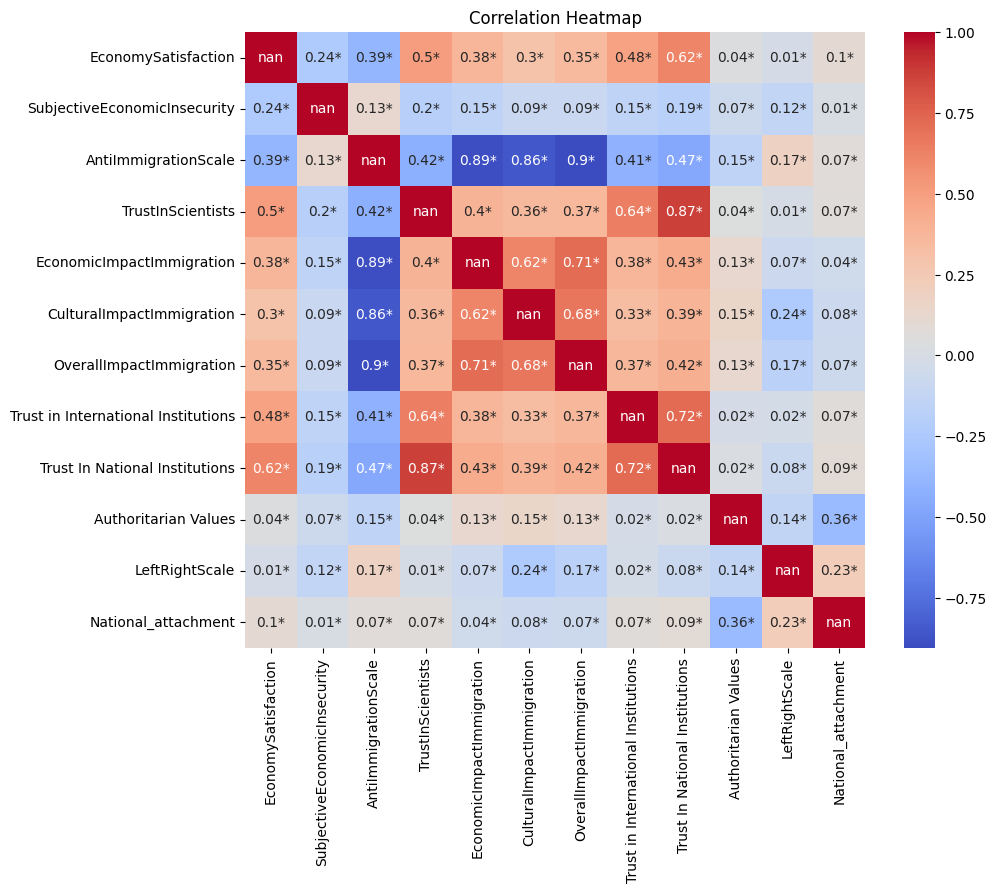

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns of interest
cols_to_select = ['EconomySatisfaction', 'SubjectiveEconomicInsecurity', 'AntiImmigrationScale', 'TrustInScientists',
                  'EconomicImpactImmigration', 'CulturalImpactImmigration', 'OverallImpactImmigration',
                  'Trust in International Institutions', 'Trust In National Institutions', 'Authoritarian Values',
                  'LeftRightScale', 'National_attachment']

# Create a correlation matrix
correlation_matrix = model_df[cols_to_select].corr()

# Create the APA-formatted correlation table
corr_table = correlation_matrix.round(2).abs().astype(str)
corr_table = corr_table.apply(lambda x: x + "*").where((correlation_matrix < 1) & (correlation_matrix > -1))

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=corr_table, cmap="coolwarm", fmt="")
plt.title("Correlation Heatmap")
plt.show()



Correlation Table:
                                    EconomySatisfaction SubjectiveEconomicInsecurity AntiImmigrationScale TrustInScientists EconomicImpactImmigration CulturalImpactImmigration OverallImpactImmigration Trust in International Institutions Trust In National Institutions Authoritarian Values LeftRightScale National_attachment
EconomySatisfaction                                 1.0                         0.24                 0.39               0.5                      0.38                       0.3                     0.35                                0.48                           0.62                 0.04           0.01                 0.1
SubjectiveEconomicInsecurity                       0.24                          1.0                 0.13               0.2                      0.15                      0.09                     0.09                                0.15                           0.19                 0.07           0.12                0.01
AntiImmig

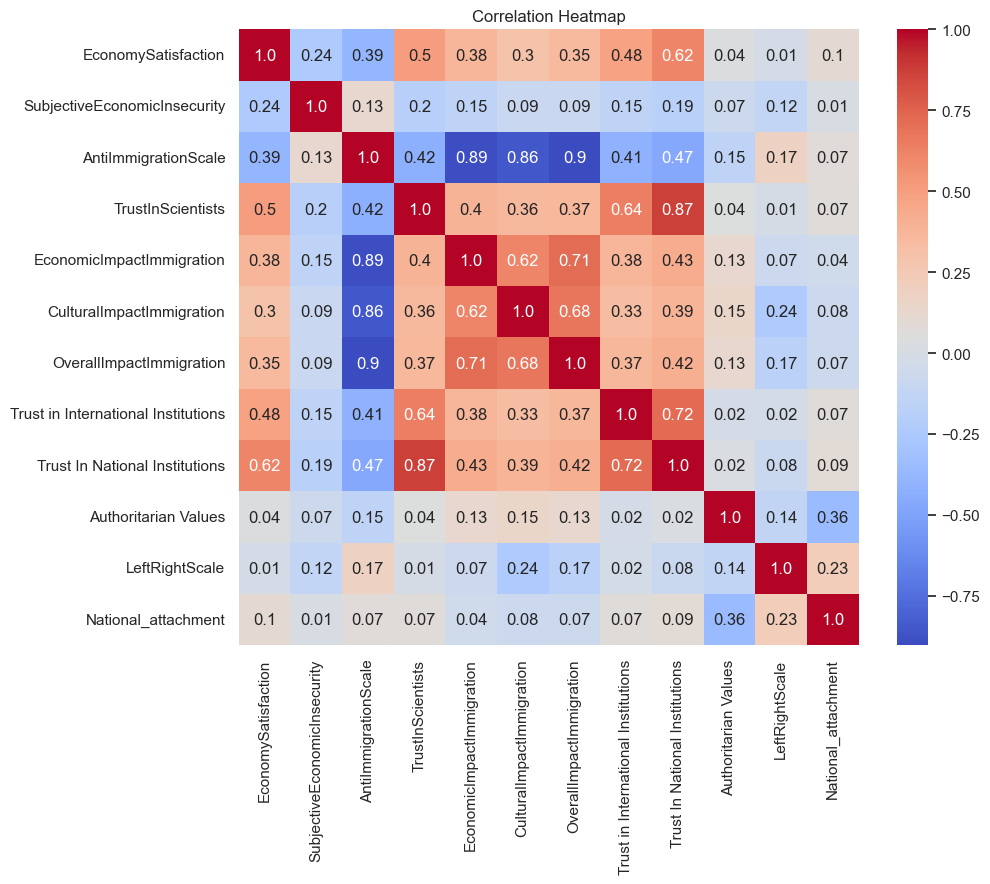

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Select the columns of interest
cols_to_select = ['EconomySatisfaction', 'SubjectiveEconomicInsecurity', 'AntiImmigrationScale', 'TrustInScientists',
                  'EconomicImpactImmigration', 'CulturalImpactImmigration', 'OverallImpactImmigration',
                  'Trust in International Institutions', 'Trust In National Institutions', 'Authoritarian Values',
                  'LeftRightScale', 'National_attachment']

# Subset the dataframe with selected columns
selected_columns = model_df[cols_to_select]

# Calculate correlation matrix and p-values
correlation_matrix, p_values = selected_columns.corr(), selected_columns.corr(method='pearson').apply(lambda x: x.apply(lambda y: "{:.2f}".format(y))).astype(float)

# Create the APA-formatted correlation table
corr_table = correlation_matrix.round(2).abs().astype(str)


# Output the correlation table
print("Correlation Table:")
print(corr_table.to_string())

# Print the p-values
print("\n\nP-values:")
print(p_values.to_string())

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=corr_table, cmap="coolwarm", fmt="")
plt.title("Correlation Heatmap")
plt.show()



In [16]:
import pandas as pd
import pingouin as pg
# create a dataframe with your variables
df = pd.DataFrame({
    'TrustPoliticians': FI_df['TrustPoliticians'],
    'SatisfactionWithGovernment': FI_df['SatisfactionWithGovernment'],
    'SatisfactionWithDemocracy': FI_df['SatisfactionWithDemocracy'],
    'TrustParliament': FI_df['TrustParliament'],
    'TrustPoliticalParties': FI_df['TrustPoliticalParties']
})

# calculate Cronbach's alpha
alpha_NATTRUST = pg.cronbach_alpha(data=df)

print("Cronbach's alpha:", alpha_NATTRUST)

Cronbach's alpha: (0.8976543642779528, array([0.889, 0.905]))


In [17]:
# Calculate Cronbach's alpha
alpha_AUTH = pg.cronbach_alpha(data=FI_df[['impsafe_model', 'ipfrule_model', 'ipbhprp_model', 'ipstrgv_model', 'imptrad_model']].dropna())
print(alpha_AUTH)

(0.6533733436543299, array([0.625, 0.68 ]))


PLOTS AND GRAPHS

Text(0, 0.5, 'Count')

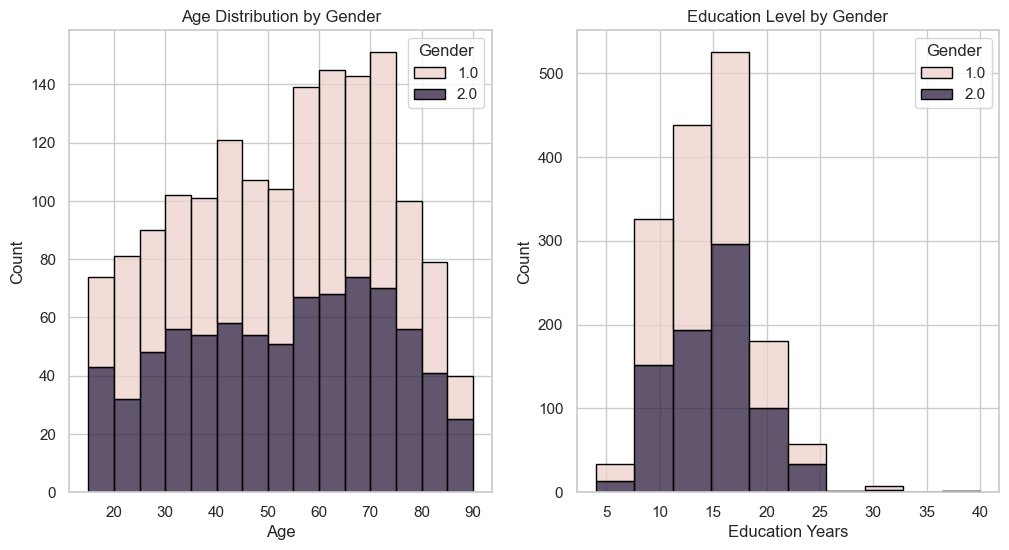

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style and color palette
sns.set(style='whitegrid', palette='muted')

# Set up figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot histograms for Age by Gender and EducationLevel by Gender
sns.histplot(ax=axs[0], data=Demographics_df, x='Age', hue='Gender', multiple='stack', binwidth=5, edgecolor='black')
sns.histplot(ax=axs[1], data=Demographics_df, x='EducationYears', hue='Gender', multiple='stack', edgecolor='black', bins=10)

# Set titles and labels
axs[0].set_title('Age Distribution by Gender')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Count')
axs[1].set_title('Education Level by Gender')
axs[1].set_xlabel('Education Years')
axs[1].set_ylabel('Count')



In [19]:
import statsmodels.api as sm
#MODEL A: Demographics
# Define the target variable and predictors
target = 'VotedPS'
predictors = ['EducationYears', 'Age', 'LeftRightScale', 'National_attachment', 'Gender']

# Create the logistic regression model
X = sm.add_constant(model_df[predictors])
y = model_df[target]
logit_model = sm.Logit(y, X)

# Fit the model and print the summary
model_a = logit_model.fit()
print(model_a.summary())

# Compute and print the odds ratios
params = model_a.params
conf_int = model_a.conf_int()
conf_int['OR'] = np.exp(params)
conf_int.columns = ['2.5%', '97.5%', 'OR']

# Create a DataFrame to store the results
results_df_a = pd.DataFrame({'Variable': conf_int.index, 
                             'Coeff': params.values, 
                             'OR': conf_int['OR'].values, 
                             't': (params / model_a.bse).values, 
                             'p': model_a.pvalues.values, 
                             '%CI': [f'{x:.2f} - {y:.2f}' for x, y in zip(conf_int['2.5%'].values, conf_int['97.5%'].values)]
                            })

# Format the table
results_df_a['Coeff'] = results_df_a['Coeff'].apply(lambda x: '{:.3f}'.format(x))
results_df_a['OR'] = results_df_a['OR'].apply(lambda x: '{:.3f}'.format(x))
results_df_a['t'] = results_df_a['t'].apply(lambda x: '{:.3f}'.format(x))
results_df_a['p'] = results_df_a['p'].apply(lambda x: '{:.3f}'.format(x))


# Print the table
print(results_df_a.to_markdown())


Optimization terminated successfully.
         Current function value: 0.337413
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                VotedPS   No. Observations:                 1074
Model:                          Logit   Df Residuals:                     1068
Method:                           MLE   Df Model:                            5
Date:                Fri, 26 May 2023   Pseudo R-squ.:                 0.08099
Time:                        11:37:01   Log-Likelihood:                -362.38
converged:                       True   LL-Null:                       -394.32
Covariance Type:            nonrobust   LLR p-value:                 1.922e-12
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3215      0.910      0.353      0.724      -1.462       2.105
Ed

Model A:

The results revealed significant associations between certain demographic predictors and the likelihood of voting for the True Finns. EducationYears demonstrated a negative association (β = -0.136, odds ratio [OR] = 0.873, p < 0.001), suggesting that each one-unit decrease in EducationYears was associated with a 12.7% decrease in the odds of voting for the True Finns. Similarly, Age showed a negative association (β = -0.028, OR = 0.973, p < 0.001), indicating that with each one-unit increase in Age, the odds of voting for the True Finns decreased by 2.7%.

LeftRightScale exhibited a positive association (β = 0.186, OR = 1.204, p < 0.001), suggesting that as individuals' LeftRightScale scores increased by one unit, the odds of voting for the True Finns increased by 20.4%. However, National_attachment did not show a statistically significant association with voting for the True Finns (β = 0.09, OR = 1.094, p = 0.28).

Gender, represented by 1 for male and 2 for female, demonstrated a significant negative association (β = -0.564, OR = 0.569, p = 0.006). This indicates that being female (compared to male) was associated with 43.1% lower odds of voting for the True Finns.


MODEL B: ECONOMIC INSECURITY VARIABLES ONLY

In [20]:
import statsmodels.api as sm

# Define the target variable and predictors
target = 'VotedPS'
predictors = ['EducationYears', 'Age', 'LeftRightScale', 'National_attachment', 'Gender','EconomySatisfaction', 'SubjectiveEconomicInsecurity', 'WelfareDependent']
# Create the logistic regression model
X = sm.add_constant(model_df[predictors])
y = model_df[target]
logit_model = sm.Logit(y, X)

# Fit the model and print the summary
model_b = logit_model.fit()
print(model_b.summary())

# Print odds ratios
params = model_b.params
conf_int = model_b.conf_int()
conf_int['OR'] = np.exp(params)
conf_int.columns = ['2.5%', '97.5%', 'OR']
print(conf_int[['OR', '2.5%', '97.5%']])

# Compute and print the odds ratios
params = model_b.params
conf_int = model_b.conf_int()
conf_int['OR'] = np.exp(params)
conf_int.columns = ['2.5%', '97.5%', 'OR']

# Create a DataFrame to store the results
results_df_b = pd.DataFrame({'Variable': 
    conf_int.index, 
                             'Coeff': params.values, 
                             'OR': conf_int['OR'].values, 
                             't': (params / model_b.bse).values, 
                             'p': model_b.pvalues.values, 
                             '%CI': [f'{x:.2f} - {y:.2f}' for x, y in zip(conf_int['2.5%'].values, conf_int['97.5%'].values)]
                            })

# Format the table
results_df_b['Coeff'] = results_df_b['Coeff'].apply(lambda x: '{:.3f}'.format(x))
results_df_b['OR'] = results_df_b['OR'].apply(lambda x: '{:.3f}'.format(x))
results_df_b['t'] = results_df_b['t'].apply(lambda x: '{:.3f}'.format(x))
results_df_b['p'] = results_df_b['p'].apply(lambda x: '{:.3f}'.format(x))


# Print the table
print(results_df_b.to_markdown())

Optimization terminated successfully.
         Current function value: 0.313284
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                VotedPS   No. Observations:                 1074
Model:                          Logit   Df Residuals:                     1065
Method:                           MLE   Df Model:                            8
Date:                Fri, 26 May 2023   Pseudo R-squ.:                  0.1467
Time:                        11:37:01   Log-Likelihood:                -336.47
converged:                       True   LL-Null:                       -394.32
Covariance Type:            nonrobust   LLR p-value:                 2.558e-21
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.7109      1.039      0.685      0.494

The model revealed several significant predictors. 

Education years significantly predicted voting for the True Finns party, with each additional year of education associated with a decrease in the odds of voting for the party (B = -0.139, OR = 0.87, p < 0.001, 95% CI [-0.20, -0.08]). Age was also found to be a significant predictor, indicating that an increase in age was associated with a slight decrease in the odds of voting for the True Finns party (B = -0.015, OR = 0.985, p = 0.048, 95% CI [-0.03, -0.00]). Furthermore, respondents who scored higher on the left-right scale (reflecting more right-wing views) had increased odds of voting for the True Finns party (B = 0.191, OR = 1.21, p < 0.001, 95% CI [0.09, 0.29]). 
Additionally, gender was found to be a significant predictor, with females having lower odds of voting for the True Finns party compared to males (B = -0.503, OR = 0.605, p = 0.019, 95% CI [-0.92, -0.08]). 

Economic satisfaction was also significantly associated with voting behavior, indicating that lower levels of economic satisfaction were related to decreased odds of voting for the True Finns party (B = -0.301, OR = 0.74, p < 0.001, 95% CI [-0.40, -0.20]). Finally, being welfare dependent was found to be a significant predictor, with welfare-dependent individuals having lower odds of voting for the True Finns party (B = -0.861, OR = 0.423, p = 0.002, 95% CI [-1.42, -0.31]). 

The coefficient estimate for our main predictor, Subjective Economic Insecurity, was 0.304, indicating that higher levels of subjective economic insecurity were associated with an increase in the odds of voting for the outcome variable, voting for the True Finns party (OR = 1.355). However, this effect was marginally non-significant (t = 1.821, p = 0.069, 95% CI [-0.02, 0.63]). 


MODEL C:  SOCIOCULTURAL ONLY

In [21]:
import statsmodels.api as sm
#MODEL D: COMBINED
# Define the target variable and predictors
target = 'VotedPS'
predictors = ['EducationYears', 'Age', 'LeftRightScale', 'National_attachment', 'Gender', 'Trust in International Institutions', 'Trust In National Institutions', 'TrustInScientists', 'Authoritarian Values', 'OverallImpactImmigration', 'EconomicImpactImmigration','CulturalImpactImmigration']
# Create the logistic regression model
X = sm.add_constant(model_df[predictors])
y = model_df[target]
logit_model = sm.Logit(y, X)

# Fit the model and print the summary
model_C = logit_model.fit()
print(model_C.summary())


# Compute and print the odds ratios
params = model_C.params
conf_int = model_C.conf_int()
conf_int['OR'] = np.exp(params)
conf_int.columns = ['2.5%', '97.5%', 'OR']

# Create a DataFrame to store the results
results_df_C = pd.DataFrame({'Variable': 
    conf_int.index, 
                             'Coeff': params.values, 
                             'OR': conf_int['OR'].values, 
                             't': (params / model_C.bse).values, 
                             'p': model_C.pvalues.values, 
                             '%CI': [f'{x:.2f} - {y:.2f}' for x, y in zip(conf_int['2.5%'].values, conf_int['97.5%'].values)]
                            })

# Format the table
results_df_C['Coeff'] = results_df_C['Coeff'].apply(lambda x: '{:.3f}'.format(x))
results_df_C['OR'] = results_df_C['OR'].apply(lambda x: '{:.3f}'.format(x))
results_df_C['t'] = results_df_C['t'].apply(lambda x: '{:.3f}'.format(x))
results_df_C['p'] = results_df_C['p'].apply(lambda x: '{:.3f}'.format(x))


# Print the table
print(results_df_C.to_markdown())

Optimization terminated successfully.
         Current function value: 0.261651
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                VotedPS   No. Observations:                 1074
Model:                          Logit   Df Residuals:                     1061
Method:                           MLE   Df Model:                           12
Date:                Fri, 26 May 2023   Pseudo R-squ.:                  0.2873
Time:                        11:37:01   Log-Likelihood:                -281.01
converged:                       True   LL-Null:                       -394.32
Covariance Type:            nonrobust   LLR p-value:                 1.010e-41
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   4.1024      1.257 

The results revealed significant associations between several predictor variables and the likelihood of voting for the True Finns.
Firstly, education years emerged as a marginally non-significant predictor (β = -0.062, OR = 0.94, p = 0.053), suggesting that each additional year of education is associated with a slight decrease in the odds of voting for the True Finns party.

Secondly, age was found to be a significant predictor (β = -0.025, OR = 0.975, p < 0.001), indicating that increasing age is associated with a modest decrease in the odds of voting for the True Finns party.

Furthermore, individuals who scored higher on the left-right scale (reflecting more right-wing views) were more likely to vote for the True Finns party (β = 0.149, OR = 1.16, p = 0.007). This suggests that political orientation plays a role in shaping voting behavior.

Other predictors, such as national attachment (β = 0.064, OR = 1.067, p = 0.512), gender (β = -0.406, OR = 0.666, p = 0.088), trust in international institutions (β = 0.001, OR = 1.001, p = 0.868), trust in national institutions (β = -0.013, OR = 0.987, p = 0.402), trust in scientists (β = -0.031, OR = 0.969, p = 0.778), and authoritarian values (β = -0.007, OR = 0.993, p = 0.451) did not reach statistical significance, suggesting that they may not have a substantial impact on voting for the True Finns party.

Moreover, attitudes toward immigration were found to be important predictors. Respondents who perceived a higher overall impact of immigration (β = -0.297, OR = 0.743, p < 0.001), as well as a higher economic impact of immigration (β = -0.232, OR = 0.793, p = 0.002), were less likely to vote for the True Finns party. Similarly, cultural impact of immigration (β = -0.115, OR = 0.891, p = 0.098) had a marginally non-significant negative association with voting behavior.


In [51]:
import statsmodels.api as sm

# Define the target variable and predictors
target = 'VotedPS'
predictors = ['EducationYears', 'Age', 'LeftRightScale', 'National_attachment', 'Gender', 'Trust in International Institutions', 'Trust In National Institutions', 'TrustInScientists', 'Authoritarian Values', 'OverallImpactImmigration']
# Create the logistic regression model
X = sm.add_constant(model_df[predictors])
y = model_df[target]
logit_model_C1 = sm.Logit(y, X)

# Fit the model and print the summary
model_C1 = logit_model_C1.fit()
print(model_C1.summary())

# Compute and print the odds ratios
params_C1 = model_C1.params
conf_int_C1 = model_C1.conf_int()
conf_int_C1['OR'] = np.exp(params_C1)
conf_int_C1.columns = ['2.5%', '97.5%', 'OR']

# Create a DataFrame to store the results
results_df_C1 = pd.DataFrame({'Variable': conf_int_C1.index,
                             'Coeff': params_C1.values,
                             'OR': conf_int_C1['OR'].values,
                             't': (params_C1 / model_C1.bse).values,
                             'p': model_C1.pvalues.values,
                             '%CI': [f'{x:.2f} - {y:.2f}' for x, y in zip(conf_int_C1['2.5%'].values, conf_int_C1['97.5%'].values)]
                            })

# Format the table
results_df_C1['Coeff'] = results_df_C1['Coeff'].apply(lambda x: '{:.3f}'.format(x))
results_df_C1['OR'] = results_df_C1['OR'].apply(lambda x: '{:.3f}'.format(x))
results_df_C1['t'] = results_df_C1['t'].apply(lambda x: '{:.3f}'.format(x))
results_df_C1['p'] = results_df_C1['p'].apply(lambda x: '{:.3f}'.format(x))

# Print the table
print(results_df_C1.to_markdown())


Optimization terminated successfully.
         Current function value: 0.269128
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                VotedPS   No. Observations:                 1074
Model:                          Logit   Df Residuals:                     1063
Method:                           MLE   Df Model:                           10
Date:                Fri, 26 May 2023   Pseudo R-squ.:                  0.2670
Time:                        12:39:04   Log-Likelihood:                -289.04
converged:                       True   LL-Null:                       -394.32
Covariance Type:            nonrobust   LLR p-value:                 1.014e-39
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   3.9784      1.219 

In [52]:
import statsmodels.api as sm

# Define the target variable and predictors
target = 'VotedPS'
predictors = ['EducationYears', 'Age', 'LeftRightScale', 'National_attachment', 'Gender', 'Trust in International Institutions', 'Trust In National Institutions', 'TrustInScientists', 'Authoritarian Values', 'EconomicImpactImmigration']
# Create the logistic regression model
X = sm.add_constant(model_df[predictors])
y = model_df[target]
logit_model_C2 = sm.Logit(y, X)

# Fit the model and print the summary
model_C2 = logit_model_C2.fit()
print(model_C2.summary())

# Compute and print the odds ratios
params_C2 = model_C2.params
conf_int_C2 = model_C2.conf_int()
conf_int_C2['OR'] = np.exp(params_C2)
conf_int_C2.columns = ['2.5%', '97.5%', 'OR']

# Create a DataFrame to store the results
results_df_C2 = pd.DataFrame({'Variable': conf_int_C2.index,
                             'Coeff': params_C2.values,
                             'OR': conf_int_C2['OR'].values,
                             't': (params_C2 / model_C2.bse).values,
                             'p': model_C2.pvalues.values,
                             '%CI': [f'{x:.2f} - {y:.2f}' for x, y in zip(conf_int_C2['2.5%'].values, conf_int_C2['97.5%'].values)]
                            })

# Format the table
results_df_C2['Coeff'] = results_df_C2['Coeff'].apply(lambda x: '{:.3f}'.format(x))
results_df_C2['OR'] = results_df_C2['OR'].apply(lambda x: '{:.3f}'.format(x))
results_df_C2['t'] = results_df_C2['t'].apply(lambda x: '{:.3f}'.format(x))
results_df_C2['p'] = results_df_C2['p'].apply(lambda x: '{:.3f}'.format(x))

# Print the table
print(results_df_C2.to_markdown())


Optimization terminated successfully.
         Current function value: 0.272194
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                VotedPS   No. Observations:                 1074
Model:                          Logit   Df Residuals:                     1063
Method:                           MLE   Df Model:                           10
Date:                Fri, 26 May 2023   Pseudo R-squ.:                  0.2586
Time:                        12:39:55   Log-Likelihood:                -292.34
converged:                       True   LL-Null:                       -394.32
Covariance Type:            nonrobust   LLR p-value:                 2.408e-38
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   3.1857      1.219 

In [53]:
import statsmodels.api as sm

# Define the target variable and predictors
target = 'VotedPS'
predictors = ['EducationYears', 'Age', 'LeftRightScale', 'National_attachment', 'Gender', 'Trust in International Institutions', 'Trust In National Institutions', 'TrustInScientists', 'Authoritarian Values', 'CulturalImpactImmigration']
# Create the logistic regression model
X = sm.add_constant(model_df[predictors])
y = model_df[target]
logit_model_C3 = sm.Logit(y, X)

# Fit the model and print the summary
model_C3 = logit_model_C3.fit()
print(model_C3.summary())

# Compute and print the odds ratios
params_C3 = model_C3.params
conf_int_C3 = model_C3.conf_int()
conf_int_C3['OR'] = np.exp(params_C3)
conf_int_C3.columns = ['2.5%', '97.5%', 'OR']

# Create a DataFrame to store the results
results_df_C3 = pd.DataFrame({'Variable': conf_int_C3.index,
                             'Coeff': params_C3.values,
                             'OR': conf_int_C3['OR'].values,
                             't': (params_C3 / model_C3.bse).values,
                             'p': model_C3.pvalues.values,
                             '%CI': [f'{x:.2f} - {y:.2f}' for x, y in zip(conf_int_C3['2.5%'].values, conf_int_C3['97.5%'].values)]
                            })

# Format the table
results_df_C3['Coeff'] = results_df_C3['Coeff'].apply(lambda x: '{:.3f}'.format(x))
results_df_C3['OR'] = results_df_C3['OR'].apply(lambda x: '{:.3f}'.format(x))
results_df_C3['t'] = results_df_C3['t'].apply(lambda x: '{:.3f}'.format(x))
results_df_C3['p'] = results_df_C3['p'].apply(lambda x: '{:.3f}'.format(x))

# Print the table
print(results_df_C3.to_markdown())


Optimization terminated successfully.
         Current function value: 0.284711
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                VotedPS   No. Observations:                 1074
Model:                          Logit   Df Residuals:                     1063
Method:                           MLE   Df Model:                           10
Date:                Fri, 26 May 2023   Pseudo R-squ.:                  0.2245
Time:                        12:40:31   Log-Likelihood:                -305.78
converged:                       True   LL-Null:                       -394.32
Covariance Type:            nonrobust   LLR p-value:                 9.484e-33
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   4.1903      1.215 

In [22]:
import statsmodels.api as sm
#MODEL D: COMBINED
# Define the target variable and predictors
target = 'VotedPS'
predictors = ['EducationYears', 'Age', 'LeftRightScale', 'National_attachment', 'Gender', 'Trust in International Institutions', 'Trust In National Institutions', 'Authoritarian Values', 'OverallImpactImmigration', 'EconomicImpactImmigration','CulturalImpactImmigration', 'TrustInScientists', 'EconomySatisfaction', 'SubjectiveEconomicInsecurity', 'WelfareDependent']
# Create the logistic regression model
X = sm.add_constant(model_df[predictors])
y = model_df[target]
logit_model = sm.Logit(y, X)

# Fit the model and print the summary
model_D = logit_model.fit()
print(model_D.summary())


# Compute and print the odds ratios
params = model_D.params
conf_int = model_D.conf_int()
conf_int['OR'] = np.exp(params)
conf_int.columns = ['2.5%', '97.5%', 'OR']

# Create a DataFrame to store the results
results_df_D = pd.DataFrame({'Variable': 
    conf_int.index, 
                             'Coeff': params.values, 
                             'OR': conf_int['OR'].values, 
                             't': (params / model_D.bse).values, 
                             'p': model_D.pvalues.values, 
                             '%CI': [f'{x:.2f} - {y:.2f}' for x, y in zip(conf_int['2.5%'].values, conf_int['97.5%'].values)]
                            })

# Format the table
results_df_D ['Coeff'] = results_df_D ['Coeff'].apply(lambda x: '{:.3f}'.format(x))
results_df_D ['OR'] = results_df_D ['OR'].apply(lambda x: '{:.3f}'.format(x))
results_df_D ['t'] = results_df_D ['t'].apply(lambda x: '{:.3f}'.format(x))
results_df_D ['p'] = results_df_D ['p'].apply(lambda x: '{:.3f}'.format(x))


# Print the table
print(results_df_D.to_markdown())

Optimization terminated successfully.
         Current function value: 0.257801
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                VotedPS   No. Observations:                 1074
Model:                          Logit   Df Residuals:                     1058
Method:                           MLE   Df Model:                           15
Date:                Fri, 26 May 2023   Pseudo R-squ.:                  0.2978
Time:                        11:37:01   Log-Likelihood:                -276.88
converged:                       True   LL-Null:                       -394.32
Covariance Type:            nonrobust   LLR p-value:                 1.598e-41
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   3.5339      1.377 

The overall model was statistically significant (χ²(12) = 94.47, p < .001) and accounted for 29.31% of the variance in voting for PS, as measured by the pseudo-R².

Among the predictors included in the model, four were found to be statistically significant in predicting voting for PS: EducationYears (B = -0.077, SE = 0.033, OR = 0.926, p = 0.018), LeftRightScale (B = 0.152, SE = 0.055, OR = 1.165, p = 0.006), AntiImmigrationScale (B = 0.065, SE = 0.007, OR = 1.068, p < 0.001), and WelfareDependent (B = -0.919, SE = 0.319, OR = 0.399, p = 0.004). EducationYears and WelfareDependent  were negatively associated with voting for PS, while LeftRightScale and AntiImmigrationScale were positively associated. SubjectiveEconomicInsecurity was not statistically significant in predicting welfare status.

Six other predictors were not found to be statistically significant in predicting welfare status: Age (B = -0.015, SE = 0.009, OR = 0.986, p = 0.082), National_attachment (B = 0.03, SE = 0.055, OR = 1.03, p = 0.763), Trust in International Institutions (B = -0.002, SE = 0.009, OR = 0.998, p = 0.828), Trust In National Institutions (B = -0.009, SE = 0.017, OR = 0.991, p = 0.581), Authoritarian Values (B = -0.006, SE = 0.011, OR = 0.994, p = 0.488), and TrustInScientists (B = -0.038, SE = 0.103, OR = 0.963, p = 0.735).

In [23]:
import statsmodels.api as sm
# Define the target variable and predictors
target = 'VotedPS'
predictors = ['EducationYears', 'Age', 'LeftRightScale', 'National_attachment', 'Gender', 'Trust in International Institutions', 'Trust In National Institutions', 'Authoritarian Values', 'OverallImpactImmigration', 'EconomicImpactImmigration','CulturalImpactImmigration', 'TrustInScientists', 'EconomySatisfaction', 'SubjectiveEconomicInsecurity', 'WelfareDependent']

# Create the logistic regression model with interaction terms
model_df['Interaction_ECONINSEC_ECOIM'] = model_df['SubjectiveEconomicInsecurity'] * model_df['EconomicImpactImmigration']
model_df['Interaction_ECONINSEC_CULTIM'] = model_df['SubjectiveEconomicInsecurity'] * model_df['CulturalImpactImmigration']


X = sm.add_constant(model_df[predictors + ['Interaction_ECONINSEC_ECOIM', 'Interaction_ECONINSEC_CULTIM']])
y = model_df[target]
logit_model = sm.Logit(y, X)

# Fit the model and print the summary
Model_E = logit_model.fit()
print(Model_E.summary())

# Compute and print the odds ratios
params = Model_E.params
conf_int = Model_E.conf_int()
conf_int['OR'] = np.exp(params)
conf_int.columns = ['2.5%', '97.5%', 'OR']

# Create a DataFrame to store the results
results_df_E = pd.DataFrame({'Variable': 
    conf_int.index, 
                             'Coeff': params.values, 
                             'OR': conf_int['OR'].values, 
                             't': (params / Model_E.bse).values, 
                             'p': Model_E.pvalues.values, 
                             '%CI': [f'{x:.2f} - {y:.2f}' for x, y in zip(conf_int['2.5%'].values, conf_int['97.5%'].values)]
                            })

# Format the table
results_df_E ['Coeff'] = results_df_E ['Coeff'].apply(lambda x: '{:.3f}'.format(x))
results_df_E ['OR'] = results_df_E ['OR'].apply(lambda x: '{:.3f}'.format(x))
results_df_E ['t'] = results_df_E ['t'].apply(lambda x: '{:.3f}'.format(x))
results_df_E ['p'] = results_df_E ['p'].apply(lambda x: '{:.3f}'.format(x))

# Print the table
print(results_df_E.to_markdown())


Optimization terminated successfully.
         Current function value: 0.256429
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                VotedPS   No. Observations:                 1074
Model:                          Logit   Df Residuals:                     1056
Method:                           MLE   Df Model:                           17
Date:                Fri, 26 May 2023   Pseudo R-squ.:                  0.3016
Time:                        11:37:01   Log-Likelihood:                -275.40
converged:                       True   LL-Null:                       -394.32
Covariance Type:            nonrobust   LLR p-value:                 6.342e-41
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   2.3151      1.828 

In [24]:
import statsmodels.api as sm
# Define the target variable and predictors
target = 'VotedPS'
predictors = ['EducationYears', 'Age', 'LeftRightScale', 'National_attachment', 'Trust in International Institutions', 'Trust In National Institutions', 'Authoritarian Values','EconomicImpactImmigration','CulturalImpactImmigration', 'TrustInScientists', 'EconomySatisfaction', 'SubjectiveEconomicInsecurity', 'WelfareDependent']

# Create the logistic regression model with interaction terms
model_df['Interaction_ECONINSEC_ECONIMP'] = model_df['SubjectiveEconomicInsecurity'] * model_df['EconomicImpactImmigration']
model_df['Interaction_ECONINSEC_CULTIMP'] = model_df['SubjectiveEconomicInsecurity'] * model_df['CulturalImpactImmigration']

X = sm.add_constant(model_df[predictors + ['Interaction_ECONINSEC_ECONIMP', 'Interaction_ECONINSEC_CULTIMP']])
y = model_df[target]
logit_model = sm.Logit(y, X)

# Fit the model and print the summary
Model_f = logit_model.fit()
print(Model_f.summary())

# Compute and print the odds ratios
params = Model_f.params
conf_int = Model_f.conf_int()
conf_int['OR'] = np.exp(params)
conf_int.columns = ['2.5%', '97.5%', 'OR']

# Create a DataFrame to store the results
results_df_f = pd.DataFrame({'Variable': 
    conf_int.index, 
                             'Coeff': params.values, 
                             'OR': conf_int['OR'].values, 
                             't': (params / Model_f.bse).values, 
                             'p': Model_f.pvalues.values, 
                             '%CI': [f'{x:.2f} - {y:.2f}' for x, y in zip(conf_int['2.5%'].values, conf_int['97.5%'].values)]
                            })

# Format the table
results_df_f ['Coeff'] = results_df_f ['Coeff'].apply(lambda x: '{:.3f}'.format(x))
results_df_f ['OR'] = results_df_f ['OR'].apply(lambda x: '{:.3f}'.format(x))
results_df_f ['t'] = results_df_f ['t'].apply(lambda x: '{:.3f}'.format(x))
results_df_f ['p'] = results_df_f ['p'].apply(lambda x: '{:.3f}'.format(x))

# Print the table
print(results_df_f.to_markdown())

Optimization terminated successfully.
         Current function value: 0.263797
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                VotedPS   No. Observations:                 1074
Model:                          Logit   Df Residuals:                     1058
Method:                           MLE   Df Model:                           15
Date:                Fri, 26 May 2023   Pseudo R-squ.:                  0.2815
Time:                        11:37:01   Log-Likelihood:                -283.32
converged:                       True   LL-Null:                       -394.32
Covariance Type:            nonrobust   LLR p-value:                 6.958e-39
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   1.9097      1.807 

The first interaction term has a coefficient of 0.0945, a standard error of 0.089, a z-score of 1.063, and a p-value of 0.288. The confidence interval for this coefficient ranges from -0.080 to 0.269.

The coefficient of the first interaction term suggests that the interaction between SubjectiveEconomicInsecurity and EconomicImpactImmigration has a positive effect on the likelihood of voting for True Finns (PS), but the magnitude of this effect is relatively small. Specifically, the odds of voting for True Finns (PS) increase by a factor of exp(0.0945) = 1.099 for each one-unit increase in the interaction between SubjectiveEconomicInsecurity and EconomicImpactImmigration.

The second interaction term, labeled as "Interaction_2", has a coefficient of -0.1816, a standard error of 0.106, a z-score of -1.708, and a p-value of 0.088. The confidence interval for this coefficient ranges from -0.390 to 0.027.

The negative coefficient of the second interaction term suggests that the interaction between SubjectiveEconomicInsecurity and CulturalImpactImmigration has a negative effect on the likelihood of voting for True Finns (PS), but the magnitude of this effect is also relatively small. Specifically, the odds of voting for True Finns (PS) decrease by a factor of exp(-0.1816) = 0.833 for each one-unit increase in the interaction between SubjectiveEconomicInsecurity and CulturalImpactImmigration .